# Lab 4: Teoría de aproximación

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1: Ajuste lineal

### a)

Cargar los datos en el archivo `Data/datos1a.dat` y usar las fórmulas para un ajuste lineal por cuadrados mínimos para obtener la recta que mejor aproxima estos datos. Graficar los datos y ajustar el contenido.

Comenzamos por hacer un análisis de los datos, que tenemos, ver con cuántos datos contamos y visualizarlos con pandas.

In [14]:
datos1a = np.loadtxt('Data/datos1a.dat')
datos1a.shape

(2, 12)

In [15]:
pd.DataFrame(data=datos1a)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.454545,0.909091,1.363636,1.818182,2.272727,2.727273,3.181818,3.636364,4.090909,4.545455,5.000000
1,-0.771352,-0.654224,0.809960,2.379648,3.149193,5.690371,6.339356,8.224764,11.880781,10.609441,12.033314,14.699071


La primera fila corresponde con los valores de $x$ y la segunda con los valores de $y$.

Queremos encontrar la recta: $y(x)=a_1 x + a_0$ que *mejor ajusta* estos datos. Es decir, determinar los coeficientes $a_1, a_0$ óptimos (falta determinar el criterio de optimización).

El método de cuadrádos mínimos para ajustar esta recta, es encontrar $a_0$ y $a_1$ tales que minizen la función:

$$ E(a_0, a_1) = \sum_{i=1}^m [y_i - (a_1 x_i + a_0)] $$

Estos valores se pueden encontrar usando las **ecuaciones normales**, y determinan los siguientes coeficientes:

$$ a_0 = {{ (\sum_{i=1}^{m} x_i^2)(\sum_{i=1}^{m} y_i) - (\sum_{i=1}^{m} x_i y_i)(\sum_{i=1}^{m} x_i) }\over{ m (\sum_{i=1}^{m} x_i^2) - (\sum_{i=1}^{m} x_i)^2 }}; a_1 = {{ (\sum_{i=1}^{m} x_i y_i) - (\sum_{i=1}^{m} x_i)(\sum_{i=1}^{m} y_i) }\over{ m (\sum_{i=1}^{m} x_i^2) - (\sum_{i=1}^{m} x_i)^2 }} $$ 

Calculamos estos coeficientes usando los datos que tenemos, vamos a generalizar esta lógica en una función:

In [17]:
def minimum_squares_adjustment(X, Y):
    assert len(X) == len(Y), 'X and Y must have the same lenght.'
    m = len(X)
    # common denominator
    denom = (m * sum(pow(X, 2))) - (pow(sum(X), 2))
    # coefs
    a_0 = ( ( sum(pow(X, 2)) * sum(Y) ) - ( sum(X * Y) * sum(X) ) ) / denom
    a_1 = ( ( m * sum(X * Y) ) - ( sum(X) * sum(Y) ) ) / denom
    # rect function
    return lambda x: (a_1 * x) + a_0

Ahora contruimos el ajuste y graficamos los resultados:

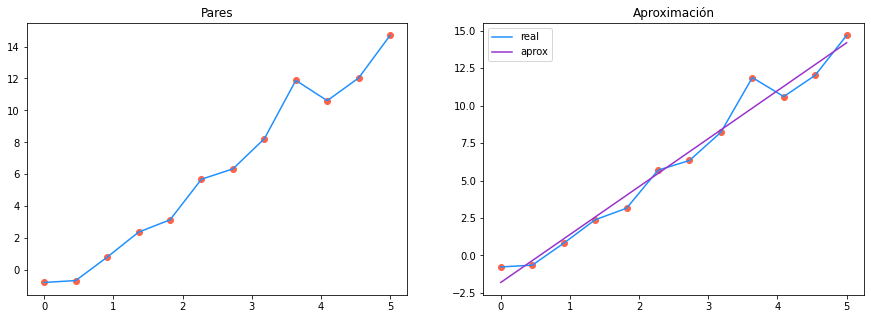

In [47]:
# buscamos los pares
X, Y = datos1a[0,:], datos1a[1,:]

# contruimos el ajuste
adjust = minimum_squares_adjustment(X, Y)
Y_pred = adjust(X)

# graficamos
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# pares
ax[0].set_title('Pares')
ax[0].plot(X, Y, color='dodgerblue')
ax[0].scatter(X, Y, color='tomato')

# aprox
ax[1].set_title('Aproximación')
ax[1].plot(X, Y, color='dodgerblue', label='real')
ax[1].scatter(X, Y, color='tomato')
ax[1].plot(X, Y_pred, color='darkorchid', label='aprox')
ax[1].legend()

plt.show()

### 3)

Dada la recta: $ y = {3 \over 4} x - {1 \over 2} $, generar el conjunto de pares, $ (x_i, y_i), i = 1,\dots,20 $ en el intervalo $ [0, 10] $, con disperción normal en el eje $ y $. Realizar un ajuste lineal a los datos, obtener los coeficientes y dibujar el ajuste.


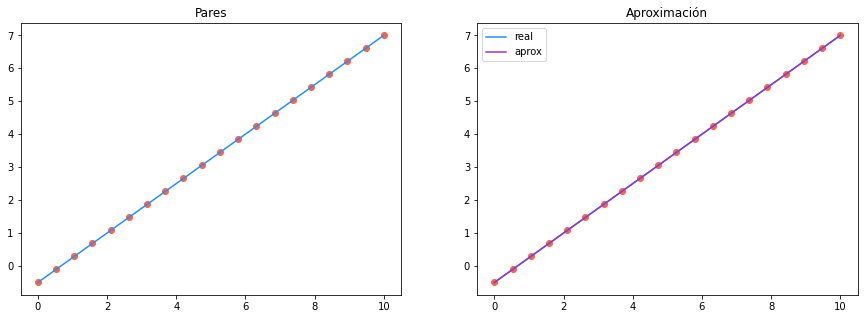

In [46]:
# calculamos el cojunto de pares
X = np.linspace(0, 10, num=20)
Y = (3./4.)*X - (1/2.)

# realizamos el ajuste
adjust = minimum_squares_adjustment(X, Y)
Y_pred = adjust(X)

# graficamos
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# pares
ax[0].set_title('Pares')
ax[0].plot(X, Y, color='dodgerblue')
ax[0].scatter(X, Y, color='tomato')

# aprox
ax[1].set_title('Aproximación')
ax[1].plot(X, Y, color='dodgerblue', label='real')
ax[1].scatter(X, Y, color='tomato')
ax[1].plot(X, Y_pred, color='darkorchid', label='aprox')
ax[1].legend()

plt.show()

## 2.

Para las siguientes funciones, generar un conjunto de pares de 50 datos, y realizar un ajuste polinomial de grado $n$ con $n \le 5$.

El problema de aproximar un conjunto de datos con un polinomio algebraico de grado $n \lt m - 1$ es similar al ajuste lineal. Se deben seleccionar coeficientes $a_0, a_1, \dots, a_n$ para minimizar el error de mínimos cuadrados:

$$ E = E_2 (a_0, \dots, a_n) = \sum_{i=1}^{m} {(y_i - P_n(x_i))}^2 $$

Numpy nos ofrece `polyfit` para determinar este polinomio.

### a)


$$ f(x) = arcsen(x), x \in [0, 1] $$ 

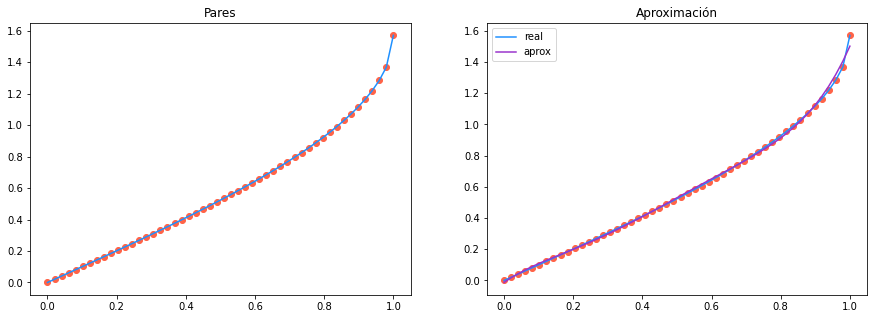

In [50]:
# definimos los parámetros
I = (0, 1)
deg = 5

# definimos los pares
X = np.linspace(*I, num=50)
Y = np.arcsin(X)

# realizamos el ajuste polinomial
coefs = np.polyfit(X, Y, deg=deg)
poly = np.poly1d(coefs)
Y_pred = np.polyval(poly, X)

# graficamos
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# pares
ax[0].set_title('Pares')
ax[0].plot(X, Y, color='dodgerblue')
ax[0].scatter(X, Y, color='tomato')

# aproximación
ax[1].set_title('Aproximación')
ax[1].plot(X, Y, color='dodgerblue', label='real')
ax[1].scatter(X, Y, color='tomato')
ax[1].plot(X, Y_pred, color='darkorchid', label='aprox')
ax[1].legend()

plt.show()

#### Estudio de la suma de residuos.

Vamos a buscar la suma de residuos de este polinomio contra la función original, para determinar el error dado por la aproximación.
El residuo está dado por $ residual = y_i - f(x_i) $ para los y aproximados sobre los $ x_i $ dados.

In [51]:
res = np.abs(Y_pred - Y)
sum_res = np.sum(res)
sum_res

0.45545018132867243

### b)

$$ g(x) = cos(x), x \in [0, 4\pi]  $$

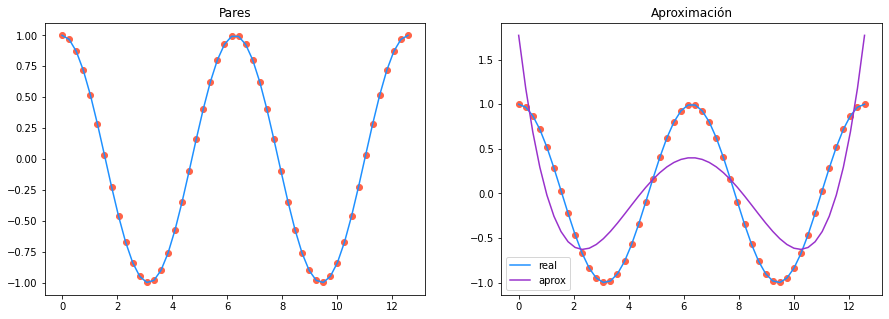

In [53]:
# definimos los parámetros
I = (0, 4*np.pi)
deg = 5

# definimos los pares
X = np.linspace(*I, num=50)
Y = np.cos(X)

# realizamos el ajuste polinomial
coefs = np.polyfit(X, Y, deg=deg)
poly = np.poly1d(coefs)
Y_pred = np.polyval(poly, X)

# graficamos
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# pares
ax[0].set_title('Pares')
ax[0].plot(X, Y, color='dodgerblue')
ax[0].scatter(X, Y, color='tomato')

# aproximación
ax[1].set_title('Aproximación')
ax[1].plot(X, Y, color='dodgerblue', label='real')
ax[1].scatter(X, Y, color='tomato')
ax[1].plot(X, Y_pred, color='darkorchid', label='aprox')
ax[1].legend()

plt.show()

#### Estudio de la suma de residuos

In [54]:
res = np.abs(Y_pred - Y)
sum_res = np.sum(res)
sum_res

18.791795635666396

Vemos que la suma de los residuos para $ g(x) = cos(x) $ (\~18) es mucho más grande que para $ f(x) = arcos(x) $ (~0.5), lo cual también se ve reflejado en el gráfico, la aproximación es mucho más certera para $ f(x) $.

## 3.

Usar los datos almacenados en `Data/datos3a.dat` y `Data/datos3b.dat` para realizar el ajuste de los siguientes modelos, es decir determinar los coeficientes de cada uno:

### a)  $ y(x) = C x^A $


### b)  $ y(x) = {x\over{Ax + B}} $


In [17]:
datos3a = np.loadtxt('Data/datos3a.dat')
datos3b = np.loadtxt('Data/datos3b.dat')

datos3a.shape, datos3b.shape

((2, 100), (2, 40))

### a)

Ahora, para transformar la expresión dada a un modelo lineal, vamos a aplicar el logaritmo:

$$ ln(y) = ln(C * x^A) = ln(C) + ln(x^A) = ln(C) + A*ln(x) $$

Y sobre estos datos podemos realizar el ajuste y buscar los coeficientes.

A: 2.997808959548637 - C 2.0055790088325627


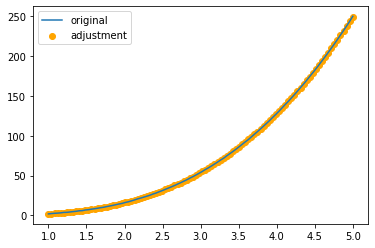

In [41]:
# get data
x, y = datos3a

# transform into linear expresion
x_hat = np.log(x)
y_hat = np.log(y)

# adjustment
degree = 1
p = np.polyfit(x_hat, y_hat, degree)

# coefs
A, C = p
C = np.exp(C)

print(f'A: {A} - C {C}')

# show results
y_pred = C * pow(x, A)

plt.plot(x, y, label='original')
plt.scatter(x, y_pred, label='adjustment', color='orange')
plt.legend()

### b)

En este caso, para transformar nuestros datos a un modelo lineal, vamos a usar la inversa de la función:

$$ { 1 \over y } = { 1 \over { x \over {A * x + B} }} = { {A * x + B} \over x } $$

A: 2.744779387962884 - B 10.195916745755556


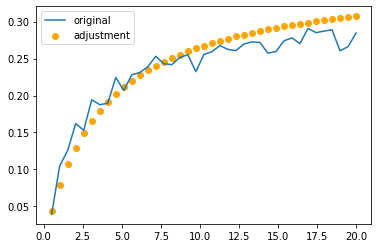

In [52]:
# data
x, y = datos3b
# remove first value because it's weird.
x, y = x[1:], y[1:] 

# transform
x_hat = np.divide(1, x)
y_hat = np.divide(1, y)

# adjustment
p = np.polyfit(x_hat, y_hat, 1)

# coefs
B, A = p

print(f'A: {A} - B {B}')

# show results
y_pred = np.divide(x, A*x + B)

plt.plot(x, y, label='original')
plt.scatter(x, y_pred, label='adjustment', color='orange')
plt.legend()

### 4.

Italia es el país más afectado por el Coronavirus, comenzando con 14 casos desde el 22 de febrero de
2020 y con una cantidad de infectados que creció exponencialmente por más de un mes. Obtener
los datos almacenados en el archivo covid italia.csv y realizar un ajuste exponencial de la forma:

$$ y(x) = ae^{bx} $$

Realizar un gráfico que contenga los datos y su ajuste.

Al igual que en el ejercicio anterior, debemos transformar la expresión a una lineal, esto se puede conseguir utilizando el logaritmo natural:

$$ ln(y) = ln(ae^{bx}) = a * ln(e^{bx}) = a * b * x $$

A: 2.360104448927258 - C 14.402893655148228


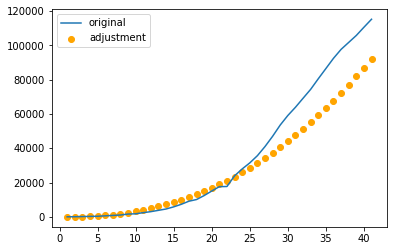

In [71]:
# load data
df = pd.read_csv('Data/covid_italia.csv', header=None)
x, y = np.array(df[0])[1:], np.array(df[1])[1:]

# transform into linear expresion
x_hat = np.log(x)
y_hat = np.log(y)

# adjustment
degree = 1
p = np.polyfit(x_hat, y_hat, degree)

# coefs
A, C = p
C = np.exp(C)

print(f'A: {A} - C {C}')

# show results
y_pred = C * pow(x, A)

plt.plot(x, y, label='original')
plt.scatter(x, y_pred, label='adjustment', color='orange')
plt.legend()